In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error, make_scorer # for regression
from sklearn.utils import shuffle

In [2]:
train = pd.read_csv('../data/2.fe_train2.csv')
test = pd.read_csv('../data/2.fe_test2.csv')

In [3]:
X = train.copy()
y = X.num_orders
X.drop(['num_orders'], axis=1, inplace=True)

X.shape, y.shape, test.shape

((456547, 2077), (456547,), (32573, 2077))

In [8]:
# train.num_orders = np.log(train.num_orders)

In [4]:
# metric for evaluation
def rmsle_metric(y_true, y_hat):
    return np.sqrt(mean_squared_log_error(y_hat, y_true))

def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [5]:
model = RandomForestRegressor(random_state=42, verbose=1, n_jobs=-1)
folds = 10
scores = np.zeros(folds)

# Create the kfold object
k_fold = KFold(n_splits=folds, random_state=42, shuffle=True)
iter_num = 0

# Extract feature names
feature_names = list(X.columns)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

for train_index, val_index in k_fold.split(X):
    print('Iteration {} of {}'.format(iter_num+1, folds))
    X_train, X_val = X.values[train_index], X.values[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    #train
    model.fit(X_train, y_train)
    
    #make predictions with validation set
    y_val_pred = model.predict(X_val)
    
    #calculate score
    score = rmsle_metric(y_val, y_val_pred)
    print('RMSLE is {}'.format(score))
    
    scores[iter_num]=score
    
    # Record the feature importances
    feature_importance_values += model.feature_importances_ / k_fold.n_splits
    
    iter_num += 1
print('\nOverall RMSLE:',str(scores))
print('Mean:',str(np.mean(scores)))
print('Deviation:',str(np.std(scores)))

# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

Iteration 1 of 10


ValueError: could not convert string to float: '0Beverages'

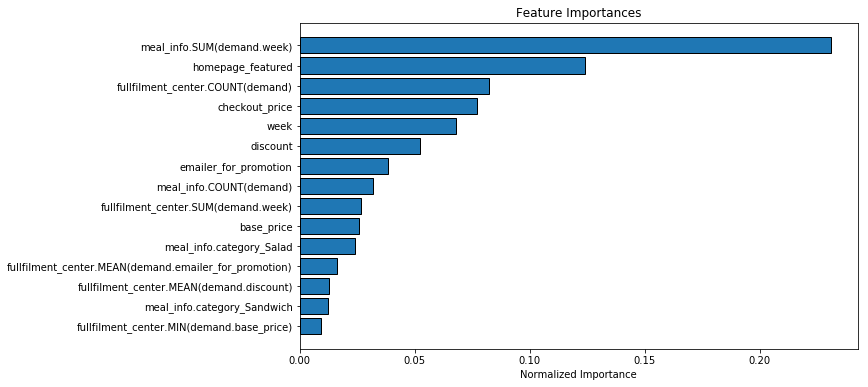

In [52]:
fi_sorted = plot_feature_importances(feature_importances)

[0]	train-RMSLE:3.71338	train-rmse:470.556	test-RMSLE:3.71338	test-rmse:470.478
[1]	train-RMSLE:3.28355	train-rmse:468.099	test-RMSLE:3.28355	test-rmse:468.02
[2]	train-RMSLE:2.99586	train-rmse:465.678	test-RMSLE:2.99586	test-rmse:465.598
[3]	train-RMSLE:2.77997	train-rmse:463.293	test-RMSLE:2.77997	test-rmse:463.213
[4]	train-RMSLE:2.60786	train-rmse:460.944	test-RMSLE:2.60786	test-rmse:460.862
[5]	train-RMSLE:2.46533	train-rmse:458.629	test-RMSLE:2.46533	test-rmse:458.547
[6]	train-RMSLE:2.33872	train-rmse:456.349	test-RMSLE:2.33874	test-rmse:456.267
[7]	train-RMSLE:2.23186	train-rmse:454.103	test-RMSLE:2.23186	test-rmse:454.02
[8]	train-RMSLE:2.13672	train-rmse:451.89	test-RMSLE:2.13674	test-rmse:451.807
[9]	train-RMSLE:2.05362	train-rmse:449.711	test-RMSLE:2.05362	test-rmse:449.626
[10]	train-RMSLE:1.97815	train-rmse:447.564	test-RMSLE:1.97816	test-rmse:447.479
[11]	train-RMSLE:1.91082	train-rmse:445.449	test-RMSLE:1.91082	test-rmse:445.363
[12]	train-RMSLE:1.84886	train-rmse:443.3

[101]	train-RMSLE:0.844641	train-rmse:336.155	test-RMSLE:0.844687	test-rmse:336.059
[102]	train-RMSLE:0.844251	train-rmse:335.486	test-RMSLE:0.844302	test-rmse:335.398
[103]	train-RMSLE:0.843731	train-rmse:334.826	test-RMSLE:0.843777	test-rmse:334.736
[104]	train-RMSLE:0.843774	train-rmse:334.166	test-RMSLE:0.843821	test-rmse:334.071
[105]	train-RMSLE:0.843582	train-rmse:333.515	test-RMSLE:0.843623	test-rmse:333.42
[106]	train-RMSLE:0.843427	train-rmse:332.874	test-RMSLE:0.843467	test-rmse:332.782
[107]	train-RMSLE:0.843566	train-rmse:332.238	test-RMSLE:0.843603	test-rmse:332.142
[108]	train-RMSLE:0.843573	train-rmse:331.607	test-RMSLE:0.84361	test-rmse:331.501
[109]	train-RMSLE:0.84362	train-rmse:330.985	test-RMSLE:0.843653	test-rmse:330.888
[110]	train-RMSLE:0.843663	train-rmse:330.38	test-RMSLE:0.843703	test-rmse:330.285
[111]	train-RMSLE:0.843716	train-rmse:329.789	test-RMSLE:0.843762	test-rmse:329.687
[112]	train-RMSLE:0.843891	train-rmse:329.18	test-RMSLE:0.843934	test-rmse:329.0

[199]	train-RMSLE:0.867066	train-rmse:293.571	test-RMSLE:0.867124	test-rmse:293.531
[200]	train-RMSLE:0.867502	train-rmse:293.274	test-RMSLE:0.867559	test-rmse:293.23
[201]	train-RMSLE:0.867336	train-rmse:293.003	test-RMSLE:0.867398	test-rmse:292.957
[202]	train-RMSLE:0.867657	train-rmse:292.715	test-RMSLE:0.867722	test-rmse:292.668
[203]	train-RMSLE:0.867726	train-rmse:292.445	test-RMSLE:0.86779	test-rmse:292.398
[204]	train-RMSLE:0.867889	train-rmse:292.17	test-RMSLE:0.86795	test-rmse:292.118
[205]	train-RMSLE:0.867786	train-rmse:291.9	test-RMSLE:0.867849	test-rmse:291.848
[206]	train-RMSLE:0.867888	train-rmse:291.635	test-RMSLE:0.867948	test-rmse:291.587
[207]	train-RMSLE:0.867821	train-rmse:291.375	test-RMSLE:0.867889	test-rmse:291.333
[208]	train-RMSLE:0.86778	train-rmse:291.119	test-RMSLE:0.867849	test-rmse:291.069
[209]	train-RMSLE:0.867831	train-rmse:290.851	test-RMSLE:0.867897	test-rmse:290.804
[210]	train-RMSLE:0.867926	train-rmse:290.593	test-RMSLE:0.867992	test-rmse:290.547

[297]	train-RMSLE:0.856185	train-rmse:273.058	test-RMSLE:0.856271	test-rmse:273.089
[298]	train-RMSLE:0.855991	train-rmse:272.908	test-RMSLE:0.856078	test-rmse:272.939
[299]	train-RMSLE:0.855688	train-rmse:272.759	test-RMSLE:0.855776	test-rmse:272.793
[300]	train-RMSLE:0.855445	train-rmse:272.607	test-RMSLE:0.855536	test-rmse:272.645
[301]	train-RMSLE:0.855226	train-rmse:272.456	test-RMSLE:0.855314	test-rmse:272.487
[302]	train-RMSLE:0.855052	train-rmse:272.298	test-RMSLE:0.855137	test-rmse:272.333
[303]	train-RMSLE:0.854815	train-rmse:272.146	test-RMSLE:0.854907	test-rmse:272.185
[304]	train-RMSLE:0.85436	train-rmse:272.012	test-RMSLE:0.854454	test-rmse:272.052
[305]	train-RMSLE:0.854116	train-rmse:271.871	test-RMSLE:0.854207	test-rmse:271.91
[306]	train-RMSLE:0.853896	train-rmse:271.721	test-RMSLE:0.853987	test-rmse:271.755
[307]	train-RMSLE:0.853729	train-rmse:271.563	test-RMSLE:0.853819	test-rmse:271.612
[308]	train-RMSLE:0.853457	train-rmse:271.414	test-RMSLE:0.853551	test-rmse:27

[395]	train-RMSLE:0.825104	train-rmse:261.232	test-RMSLE:0.825215	test-rmse:261.366
[396]	train-RMSLE:0.824821	train-rmse:261.133	test-RMSLE:0.824933	test-rmse:261.268
[397]	train-RMSLE:0.824505	train-rmse:261.041	test-RMSLE:0.824612	test-rmse:261.178
[398]	train-RMSLE:0.824248	train-rmse:260.945	test-RMSLE:0.824356	test-rmse:261.083
[399]	train-RMSLE:0.823899	train-rmse:260.851	test-RMSLE:0.824004	test-rmse:260.993
[400]	train-RMSLE:0.823576	train-rmse:260.756	test-RMSLE:0.823686	test-rmse:260.896
[401]	train-RMSLE:0.823303	train-rmse:260.659	test-RMSLE:0.823414	test-rmse:260.798
[402]	train-RMSLE:0.822956	train-rmse:260.565	test-RMSLE:0.823067	test-rmse:260.709
[403]	train-RMSLE:0.822559	train-rmse:260.477	test-RMSLE:0.822669	test-rmse:260.62
[404]	train-RMSLE:0.822167	train-rmse:260.384	test-RMSLE:0.822275	test-rmse:260.523
[405]	train-RMSLE:0.821879	train-rmse:260.287	test-RMSLE:0.821984	test-rmse:260.426
[406]	train-RMSLE:0.821575	train-rmse:260.189	test-RMSLE:0.821677	test-rmse:2

[493]	train-RMSLE:0.798175	train-rmse:253.389	test-RMSLE:0.798297	test-rmse:253.579
[494]	train-RMSLE:0.797976	train-rmse:253.31	test-RMSLE:0.798095	test-rmse:253.5
[495]	train-RMSLE:0.797766	train-rmse:253.23	test-RMSLE:0.79789	test-rmse:253.422
[496]	train-RMSLE:0.797534	train-rmse:253.15	test-RMSLE:0.79766	test-rmse:253.346
[497]	train-RMSLE:0.797266	train-rmse:253.087	test-RMSLE:0.797392	test-rmse:253.283
[498]	train-RMSLE:0.797093	train-rmse:253.028	test-RMSLE:0.79722	test-rmse:253.223
[499]	train-RMSLE:0.796949	train-rmse:252.95	test-RMSLE:0.79708	test-rmse:253.146


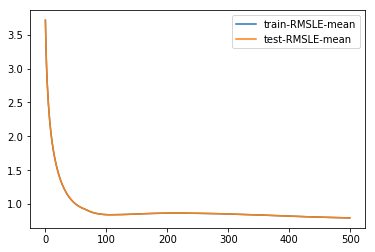

In [60]:
dtrain = xgb.DMatrix(X, y, missing=0.0, nthread=-1)

def rmsle_xgb(predictions, dmat):
    labels = dmat.get_label()
    diffs = np.log(predictions + 1) - np.log(labels + 1)
    squared_diffs = np.square(diffs)
    avg = np.mean(squared_diffs)
    return ('RMSLE', np.sqrt(avg))

params = {
    'objective': 'reg:linear',
    'max_depth': 2,
    'learning_rate': .01
}
results = xgb.cv(params, dtrain, 500, early_stopping_rounds=10, feval=rmsle_xgb, nfold=10, verbose_eval=True, \
                     show_stdv=False)
results[['train-RMSLE-mean', 'test-RMSLE-mean']].plot()